<a href="https://colab.research.google.com/github/vinicius-vses/Formacao-Specialisterne/blob/main/Analise_vendedor_desempenho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste projeto da Formação da Specialisterne, analisei o desempenho dos vendedores Ana, José e João com base em critérios específicos:

* Total de Vendas
* % da Meta Atingida
* Bateu a Meta
* Clientes Abordados
* Vendas Fechadas
* Taxa de Conversão Média

Cada vendedor é pontuado em cada critério, onde o melhor desempenho recebe 1 ponto e os demais 0.
Ao final, contabilizamos os pontos para identificar o vendedor com o melhor desempenho geral.

Ao longo da análise, cada critério será detalhado em quatro seções:
* Descrição
* Pergunta
* Premissa
* Conclusão

Tal organização oferece uma visão completa e fundamentada sobre o desempenho de cada vendedor.

In [2]:
!pip install openpyxl

import pandas as pd
from google.colab import drive
from IPython.display import display
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/ColabNotebooks/vendedores-desempenho-mes.xlsx'

df = pd.read_excel(file_path)

meta = 2000

df['Total de Vendas'] = df['Total de Vendas'].replace({'R\$ ': '', ',': ''}, regex=True).astype(float)
df['Meta Mensal'] = df['Meta Mensal'].replace({'R\$ ': '', ',': ''}, regex=True).astype(float)
df['Clientes Abordados'] = df['Clientes Abordados'].astype(int)
df['Vendas Fechadas'] = df['Vendas Fechadas'].astype(int)

df_dados = df.groupby('Vendedor').agg(
    Total_de_Vendas=('Total de Vendas', 'sum'),
    Meta_Mensal=('Meta Mensal', 'first'),
    Clientes_Abordados=('Clientes Abordados', 'sum'),
    Vendas_Fechadas=('Vendas Fechadas', 'sum')
).reset_index()

df_dados['% da Meta Atingida'] = (df_dados['Total_de_Vendas'] / meta) * 100
df_dados['Taxa de Conversão Média'] = (df_dados['Vendas_Fechadas'] / df_dados['Clientes_Abordados']) * 100
df_dados['Bateu a Meta'] = df_dados['% da Meta Atingida'].apply(lambda x: 'Sim' if x >= 100 else 'Não')

df_dados['Total_de_Vendas'] = df_dados['Total_de_Vendas'].map('R$ {:.2f}'.format)
df_dados['Meta_Mensal'] = df_dados['Meta_Mensal'].map('R$ {:.2f}'.format)
df_dados['% da Meta Atingida'] = df_dados['% da Meta Atingida'].map('{:.2f}%'.format)
df_dados['Taxa de Conversão Média'] = df_dados['Taxa de Conversão Média'].map('{:.2f}%'.format)

df_dados = df_dados[['Vendedor', 'Meta_Mensal', 'Total_de_Vendas', '% da Meta Atingida', 'Bateu a Meta',
                     'Clientes_Abordados', 'Vendas_Fechadas', 'Taxa de Conversão Média']]

def color_bateu_meta(value):
    color = '#00FF00 ' if value == 'Sim' else '#C71585 0000 '
    return f'color: {color}'

def color_meta_atingida(value):
    value_float = float(value.replace('%', ''))
    color = '#00FF00 ' if value_float >= 100 else '#F99556 '
    return f'color: {color}'

def color_total_vendas(value):
    value_float = float(value.replace('R$', '').replace(',', ''))
    color = '#00FF00 ' if value_float >= 2000 else '#F99556 '
    return f'color: {color}'

styled_df = df_dados.style.map(color_bateu_meta, subset=['Bateu a Meta']) \
                          .map(color_meta_atingida, subset=['% da Meta Atingida']) \
                          .map(color_total_vendas, subset=['Total_de_Vendas']) \
                          .set_properties(**{
                              'border': '1px solid black',
                              'padding': '5px',
                              'text-align': 'center'
                          }) \
                          .set_table_styles([
                              {
                                  'selector': 'th',
                                  'props': [('border', '1px solid black')]
                              }
                          ])

styled_df.set_table_attributes("style='border-collapse:collapse'").hide(axis='index')
display(styled_df)

Vendedor,Meta_Mensal,Total_de_Vendas,% da Meta Atingida,Bateu a Meta,Clientes_Abordados,Vendas_Fechadas,Taxa de Conversão Média
Ana,R$ 2000.00,R$ 2445.00,122.25%,Sim,113,108,95.58%
José,R$ 2000.00,R$ 1630.00,81.50%,Não,162,108,66.67%
João,R$ 2000.00,R$ 1801.52,90.08%,Não,186,108,58.06%


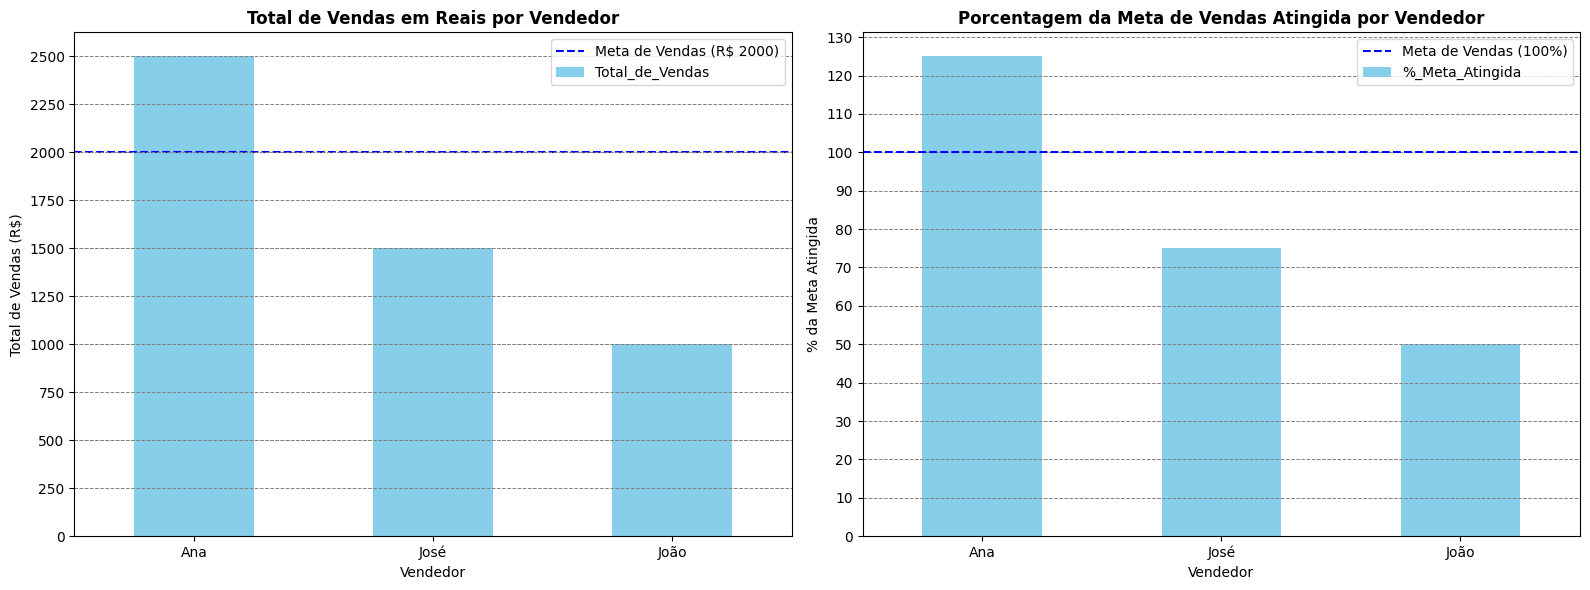

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Vendedor': ['Ana', 'José', 'João'],
    'Total_de_Vendas': ['R$ 2500', 'R$ 1500', 'R$ 1000']
}

df_dados = pd.DataFrame(data)
df_dados['Total_de_Vendas'] = pd.to_numeric(df_dados['Total_de_Vendas'].replace('[R$ ]', '', regex=True))
meta_vendas = 2000
df_dados['%_Meta_Atingida'] = (df_dados['Total_de_Vendas'] / meta_vendas) * 100

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df_dados.set_index('Vendedor')['Total_de_Vendas'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Total de Vendas em Reais por Vendedor', fontweight='bold')
axs[0].set_xlabel('Vendedor')
axs[0].set_ylabel('Total de Vendas (R$)')
axs[0].axhline(meta_vendas, color='blue', linestyle='--', linewidth=1.5, label='Meta de Vendas (R$ 2000)')
for valor in range(500, 2500, 500):
    axs[0].axhline(valor, color='gray', linestyle='--', linewidth=0.7)
axs[0].yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
axs[0].set_yticks(range(0, 2750, 250))
axs[0].legend()
axs[0].tick_params(axis='x', rotation=0)

df_dados.set_index('Vendedor')['%_Meta_Atingida'].plot(kind='bar', ax=axs[1], color='skyblue')
axs[1].set_title('Porcentagem da Meta de Vendas Atingida por Vendedor', fontweight='bold')
axs[1].set_xlabel('Vendedor')
axs[1].set_ylabel('% da Meta Atingida')
axs[1].axhline(100, color='blue', linestyle='--', linewidth=1.5, label='Meta de Vendas (100%)')
axs[1].yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
axs[1].set_yticks(range(0, 140, 10))
axs[1].legend()
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**Descrição**: Esta métrica indica o quanto o vendedor chegou próximo (ou superou) a meta em reais.

**Pergunta**: Qual vendedor atingiu, superou ou não superou a meta?

**Premissa**: Vendedores que atingem ou superam a meta com regularidade demonstram um bom desempenho em cumprir objetivos definidos.

**Conclusão**: Ana teve um desempenho superior, superando a meta tanto em valores absolutos quanto em percentual, enquanto José e João ficaram abaixo da meta, sendo que José apresentou o menor desempenho.

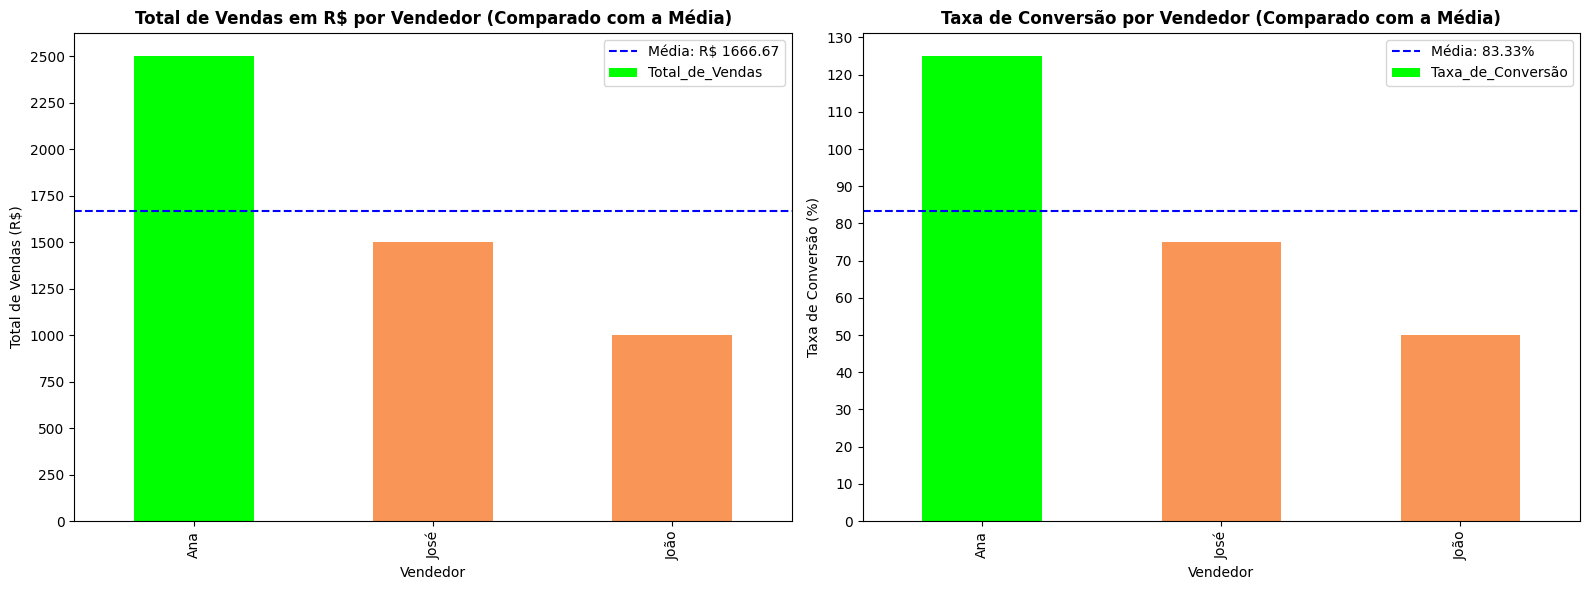

In [15]:
df_dados['Total_de_Vendas'] = df_dados['Total_de_Vendas'].replace('[R$ ]', '', regex=True).astype(float)

df_dados['Taxa_de_Conversão'] = df_dados['%_Meta_Atingida'].replace('%', '', regex=True).astype(float)

media_total_vendas = df_dados['Total_de_Vendas'].mean()
media_taxa_conversao = df_dados['Taxa_de_Conversão'].mean()

df_dados['Acima_da_Média_Vendas'] = df_dados['Total_de_Vendas'] > media_total_vendas
df_dados['Acima_da_Média_Conversão'] = df_dados['Taxa_de_Conversão'] > media_taxa_conversao

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df_dados.set_index('Vendedor')['Total_de_Vendas'].plot(
    kind='bar',
    ax=axes[0],
    color=['#00FF00' if x else '#F99556' for x in df_dados['Acima_da_Média_Vendas']]
)
axes[0].axhline(media_total_vendas, color='blue', linestyle='--', linewidth=1.5, label=f'Média: R$ {media_total_vendas:.2f}')
axes[0].set_title('Total de Vendas em R$ por Vendedor (Comparado com a Média)', fontweight='bold')
axes[0].set_ylabel('Total de Vendas (R$)')
axes[0].legend()
axes[0].set_yticks(range(0, int(df_dados['Total_de_Vendas'].max()) + 250, 250))

df_dados.set_index('Vendedor')['Taxa_de_Conversão'].plot(
    kind='bar',
    ax=axes[1],
    color=['#00FF00' if x else '#F99556' for x in df_dados['Acima_da_Média_Conversão']]
)
axes[1].axhline(media_taxa_conversao, color='blue', linestyle='--', linewidth=1.5, label=f'Média: {media_taxa_conversao:.2f}%')
axes[1].set_title('Taxa de Conversão por Vendedor (Comparado com a Média)', fontweight='bold')
axes[1].set_ylabel('Taxa de Conversão (%)')
axes[1].legend()

axes[1].set_yticks(range(0, int(df_dados['Taxa_de_Conversão'].max()) + 10, 10))

plt.tight_layout()
plt.show()

**Descrição**: Compara as métricas de cada vendedor com a média da equipe.

**Pergunta**: Quais vendedores estão acima ou abaixo da média da equipe?

**Premissa**: Ajuda a identificar quem está se destacando em relação ao desempenho médio do grupo.

**Conclusão**: Ana é a vendedora com o melhor desempenho tanto em termos de volume de vendas quanto na eficiência de conversão. José e João, por outro lado, têm desempenhos similares e abaixo da média, indicando que poderiam se beneficiar de melhorias nas suas abordagens para alcançar melhores resultados.

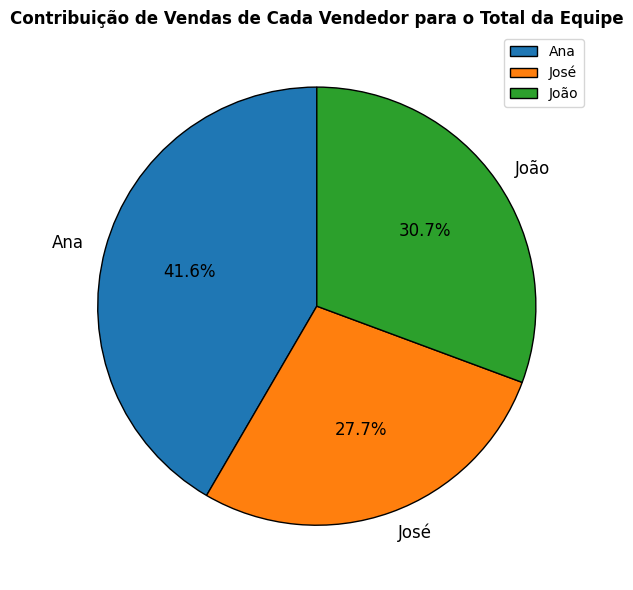

In [34]:
df_dados['Total de Vendas'] = df_dados['Total de Vendas'].replace({'R\$ ': '', ',': ''}, regex=True).astype(float)

total_vendas = df_dados['Total de Vendas'].sum()
df_dados['Contribuição_%'] = (df_dados['Total de Vendas'] / total_vendas) * 100

fig, ax = plt.subplots(figsize=(8, 6))
df_dados.set_index('Vendedor')['Contribuição_%'].plot(
    kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, legend=True,
    wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12}
)

ax.set_title('Contribuição de Vendas de Cada Vendedor para o Total da Equipe', fontweight='bold')
ax.set_ylabel('')
plt.tight_layout()

plt.show()

**Descrição**: Compara as vendas individuais de cada vendedor com as vendas totais da equipe.

**Pergunta**: Qual é a contribuição percentual de cada vendedor para o total de vendas?

**Premissa**: Vendedores com maior participação nas vendas totais demonstram maior contribuição para os resultados gerais da equipe.

**Conclusão**: Ana é a vendedora que mais contribui para o total de vendas da equipe, seguida por João e José. A distribuição sugere que Ana lidera em performance, enquanto João e José complementam o total com participações menores. Isso pode indicar que Ana possui estratégias de vendas mais eficazes ou uma abordagem mais produtiva em comparação aos colegas.

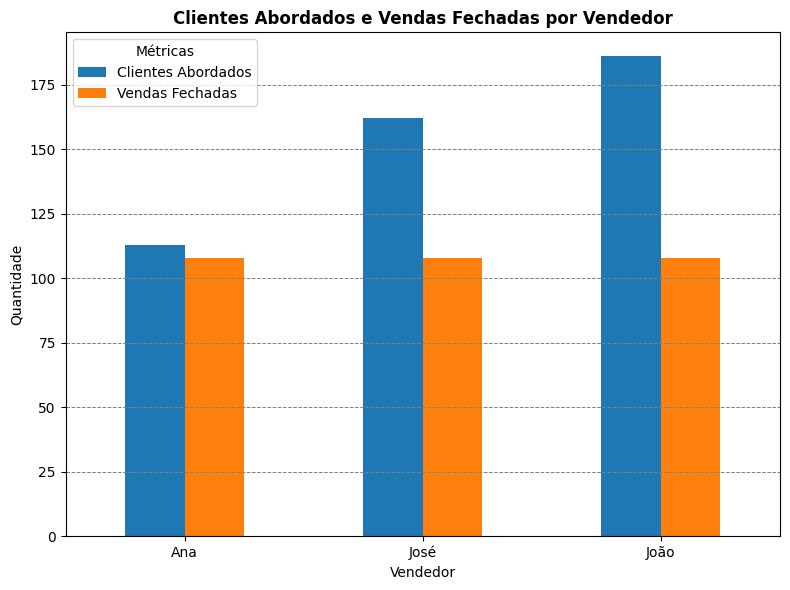

In [36]:
df_dados['Total de Vendas'] = pd.to_numeric(df_dados['Total de Vendas'].replace({'R\$ ': '', ',': ''}, regex=True), errors='coerce')
df_dados['Meta Mensal'] = pd.to_numeric(df_dados['Meta Mensal'].replace({'R\$ ': '', ',': ''}, regex=True), errors='coerce')

df_dados['% da Meta Atingida'] = pd.to_numeric(df_dados['% da Meta Atingida'].astype(str).str.replace('%', '').replace(',', '.'), errors='coerce')
df_dados['Taxa de Conversão Média'] = pd.to_numeric(df_dados['Taxa de Conversão Média'].astype(str).str.replace('%', '').replace(',', '.'), errors='coerce')

df_top = df_dados[['Vendedor', 'Clientes Abordados', 'Vendas Fechadas']]

fig, ax = plt.subplots(figsize=(8, 6))
df_top.set_index('Vendedor')[['Clientes Abordados', 'Vendas Fechadas']].plot(kind='bar', ax=ax)

ax.set_title('Clientes Abordados e Vendas Fechadas por Vendedor', fontweight='bold')
ax.set_xlabel('Vendedor')
ax.set_ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.tight_layout()

ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')

plt.show()

**Descrição**: Análise do número de clientes abordados e vendas fechadas por vendedor.

**Pergunta**: Qual vendedor está abordando mais clientes e fechando mais vendas?

**Premissa**: Vendedores que abordam mais clientes e fecham mais vendas tendem a ter maior impacto no desempenho geral.

**Conclusão**: Ana demonstra a melhor taxa de conversão entre os vendedores, já que o número de vendas fechadas é próximo ao número de clientes abordados. José e João abordaram mais clientes, mas converteram menos proporcionalmente, sugerindo que a estratégia de abordagem de Ana é mais eficaz em gerar vendas apesar dos esforços de José e João.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

file_path = '/content/drive/MyDrive/ColabNotebooks/vendedores-consistencia.xlsx'

df = pd.read_excel(file_path)

for vendedor in ['Ana', 'José', 'João']:
    df[vendedor] = df[vendedor].replace({'R\$ ': '', ',': '', ' ': ''}, regex=True).astype(float)

contagem = {
    'Vendedor': [],
    'Dias no Verde': [],
    'Dias no Vermelho': []
}

for vendedor in ['Ana', 'José', 'João']:
    dias_no_verde = (df[vendedor] >= 0).sum()
    dias_no_vermelho = (df[vendedor] < 0).sum()

    contagem['Vendedor'].append(vendedor)
    contagem['Dias no Verde'].append(dias_no_verde)
    contagem['Dias no Vermelho'].append(dias_no_vermelho)

df_contagem = pd.DataFrame(contagem)

for vendedor in ['Ana', 'José', 'João']:
    df[vendedor] = df[vendedor].map(lambda x: f'R$ {x:,.2f}'.replace('.', ',') if isinstance(x, (int, float)) else x)

def cor_negativo_vermelho(value):
    try:
        value_float = float(value.replace("R$", "").replace(",", "").replace(" ", "").replace(".", ""))
        color = '#F99556 ' if value_float < 0 else '#00FF00 '
        return f'color: {color}'
    except ValueError:
        return 'color: black'

df.reset_index(drop=True, inplace=True)
styled_df = df.style.map(cor_negativo_vermelho, subset=['Ana', 'José', 'João']) \
                    .set_table_styles(
                        [{'selector': 'td', 'props': [('font-family', 'monospace'), ('text-align', 'center'), ('border', '1px solid black')]}] +
                        [{'selector': 'th', 'props': [('text-align', 'center'), ('border', '1px solid black')]}]
                    ) \
                    .set_properties(**{'text-align': 'center'}) \
                    .hide(axis="index")

display(styled_df)

display(HTML("<br>"))

df_contagem.reset_index(drop=True, inplace=True)
styled_df_contagem = df_contagem.style.set_properties(**{
    'text-align': 'center',
    'font-family': 'monospace',
    'padding': '5px'
}).set_table_styles(
    [{'selector': 'td', 'props': [('border', '1px solid black')]}] +
    [{'selector': 'th', 'props': [('border', '1px solid black')]}]
).hide(axis="index")

display(styled_df_contagem)

mais_dias_no_verde = df_contagem.loc[df_contagem['Dias no Verde'].idxmax(), 'Vendedor']
mais_dias_no_vermelho = df_contagem.loc[df_contagem['Dias no Vermelho'].idxmax(), 'Vendedor']

print(f"\nVendedor(a) com mais dias no verde: {mais_dias_no_verde}")
print(f"Vendedor(a) com mais dias no vermelho: {mais_dias_no_vermelho}")

Data,Ana,José,João
01 - seg,"R$ -34,52","R$ 15,48","R$ 25,48"
02 - ter,"R$ -44,52","R$ -24,52","R$ -14,52"
03 - qua,"R$ 335,48","R$ -14,52","R$ 55,48"
04 - qui,"R$ -57,52","R$ -4,52","R$ 25,48"
05 - sex,"R$ 15,48","R$ 5,48","R$ -14,52"
06 - sáb,"R$ -19,52","R$ 55,48","R$ 5,48"
07 - dom,"R$ 225,48","R$ 125,48","R$ -4,52"
08 - seg,"R$ -54,52","R$ -54,52","R$ 55,48"
09 - ter,"R$ -49,52","R$ -49,52","R$ 25,48"
10 - qua,"R$ 5,48","R$ -4,52","R$ 2,48"


Vendedor,Dias no Verde,Dias no Vermelho
Ana,8,15
José,10,13
João,15,8



Vendedor(a) com mais dias no verde: João
Vendedor(a) com mais dias no vermelho: Ana


**Descrição**: Os dados apresentados correspondem ao desempenho financeiro diário.

**Pergunta**: Quantos dias cada vendedor manteve vendas positivas (no Verde) e negativas (no Vermelho) durante o período analisado?

**Premissa**: Os valores são considerados positivos ou negativos com base na lucratividade diária. Valores positivos representam vendas lucrativas (no Verde), e valores negativos indicam prejuízo (no Vermelho).

**Conclusão**: Em 23 dias de análise, Ana teve 8 dias lucrativos e 15 com prejuízo, José obteve 10 dias de lucro e 13 de prejuízo, e João se destacou com 14 dias no verde e 8 no vermelho, mostrando o desempenho mais consistente.

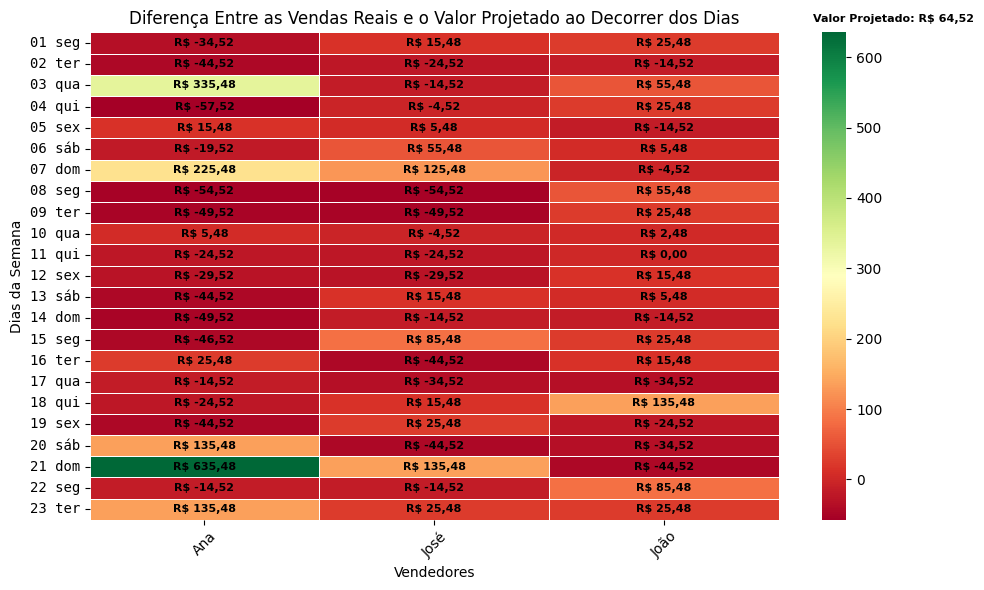


O(A) vendedor(a) com o menor desvio padrão é o(a) João, com um desvio de 40.92


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

file_path = '/content/drive/MyDrive/ColabNotebooks/vendedores-consistencia.xlsx'

df = pd.read_excel(file_path)

df['Data'] = df['Data'].str.replace(' - ', ' ')
df['Data'] = df['Data'].str.split(' ').str[:2].str.join(' ')

for vendedor in ['Ana', 'José', 'João']:
    df[vendedor] = df[vendedor].replace({'R\$ ': '', ',': '', ' ': ''}, regex=True).astype(float)

heatmap_data = df.set_index('Data')
heatmap_data = heatmap_data.sort_index(key=lambda x: pd.to_datetime(x.str.split(' ').str[0], format='%d'))

vmin_value = heatmap_data[['Ana', 'José', 'João']].min().min()

def to_currency(x, pos):
    return f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data[['Ana', 'José', 'João']], cmap='RdYlGn', annot=False, fmt='.2f',
            linewidths=0.5, vmin=vmin_value)

for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'R$ {heatmap_data.iloc[i, j]:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
                 ha='center', va='center', color='black', fontsize=8, fontweight='bold')

plt.title('Diferença Entre as Vendas Reais e o Valor Projetado ao Decorrer dos Dias')
plt.xlabel('Vendedores')
plt.ylabel('Dias da Semana')
plt.xticks(rotation=45)
plt.yticks(fontsize=10, fontname='monospace')

plt.text(3.5, -0.5, 'Valor Projetado: R$ 64,52', ha='center', fontsize=8, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

std_values = df[['Ana', 'José', 'João']].std()

vendedor_menor_desvio = std_values.idxmin()
print(f'\nO(A) vendedor(a) com o menor desvio padrão é o(a) {vendedor_menor_desvio}, com um desvio de {std_values[vendedor_menor_desvio]:.2f}')

**Descrição**: Avalia a consistência do desempenho em relação às metas ao longo do tempo.

**Pergunta**: Qual vendedor mantém um desempenho mais consistente em relação à meta?

**Premissa**: Vendedores com menor desvio padrão tendem a ser mais consistentes em seu desempenho.

**Conclusão**: A análise do desempenho de vendas mostra uma variação significativa nos valores entre os vendedores e ao longo do tempo. Observa-se que a vendedora Ana apresenta picos positivos consideráveis, especialmente nos dias 3, 7 e 21, enquanto José e João apresentam valores mais estáveis e geralmente menores, com menos flutuações positivas. Isso sugere que Ana teve momentos de destaque em vendas, mas também houve dias negativos, indicando instabilidade. José e João, por outro lado, mantiveram um desempenho mais uniforme, embora sem alcançar os picos de Ana.



In [10]:
import pandas as pd
from IPython.display import display

dados = {
    "Vendedor": ["Ana", "José", "João"],
    "Mais Vendas em R$": [1, 0, 0],
    "Bateu a Meta": [1, 0, 0],
    "Clientes Abordados": [0, 0, 1],
    "Maior Conversão": [1, 0, 0],
    "Consistência": [0, 0, 1]
}

tabela_vendedores = pd.DataFrame(dados)

tabela_vendedores["Pontuação"] = tabela_vendedores.iloc[:, 1:].sum(axis=1)

styled_table = (
    tabela_vendedores.style
    .set_table_attributes('style="border-collapse: collapse; margin: 20px 0;"')
    .set_properties(**{
        'border': '1px solid black',
        'text-align': 'center',
        'font-family': 'monospace',
        'padding': '5px'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [('border', '1px solid black'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1px solid black')]}
    ])
    .hide(axis="index")
)

display(styled_table)

vendedor_maior_pontuacao = tabela_vendedores.loc[tabela_vendedores['Pontuação'].idxmax(), 'Vendedor']
maior_pontuacao = tabela_vendedores['Pontuação'].max()

print(f"\nO(A) vendedor(a) com o maior número de pontos é {vendedor_maior_pontuacao} com {maior_pontuacao} pontos.")
print(f"\nPodemos concluir que o(a) vendedor(a) {vendedor_maior_pontuacao} obteve o melhor desempenho!")

Vendedor,Mais Vendas em R$,Bateu a Meta,Clientes Abordados,Maior Conversão,Consistência,Pontuação
Ana,1,1,0,1,0,3
José,0,0,0,0,0,0
João,0,0,1,0,1,2



O(A) vendedor(a) com o maior número de pontos é Ana com 3 pontos.

Podemos concluir que o(a) vendedor(a) Ana obteve o melhor desempenho!
